<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 11 - Metode Deteksi Objek: Template Matching, Edge Detection, Corner Detection, Grid Detection, Contour Detection

|||
|-|-|
|Nama|Muhammad Irfan Nur Hakim|
|Kelas|TI-3F|
|NIM|2241720230|
|Absen|`15`|
|||


<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://github.com/irfannhkm/PCVK_GANJIL_24-25" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/github.svg" alt="irfan.nhkm" height="30" width="40" /></a>

[LINK GITHUB](https://github.com/irfannhkm/PCVK_GANJIL_24-25)

[LINK GOOGLE COLAB](https://colab.research.google.com/drive/15OvcHV_T3FGXAegRpb3CXYZ9e4-qjQU4?usp=sharing)

## Latihan Praktikum

---

**1. Buka https://colab.research.google.com/, kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.**

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.**

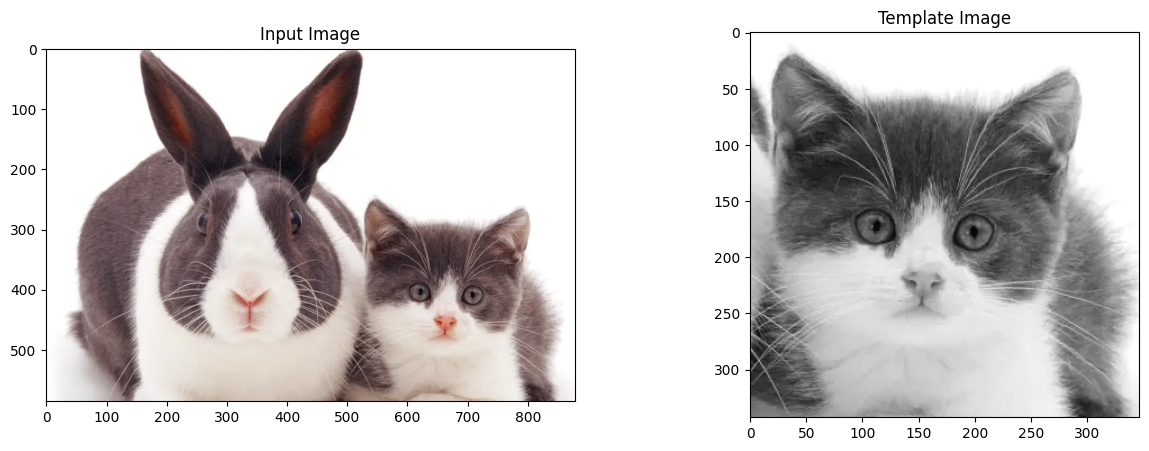

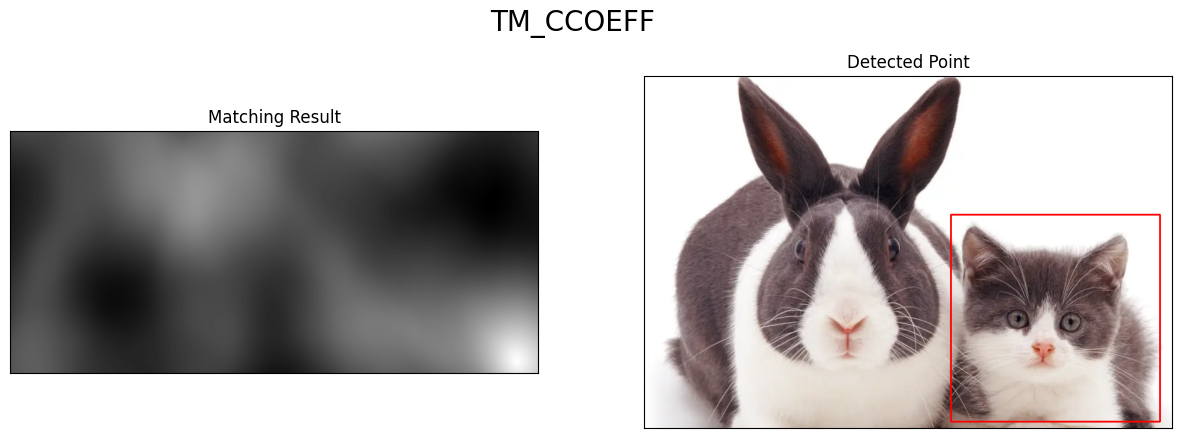

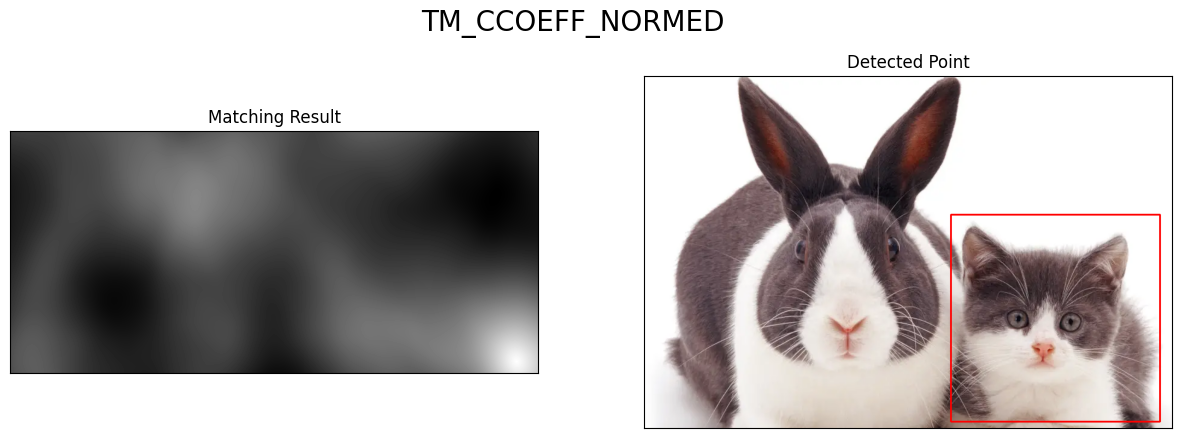

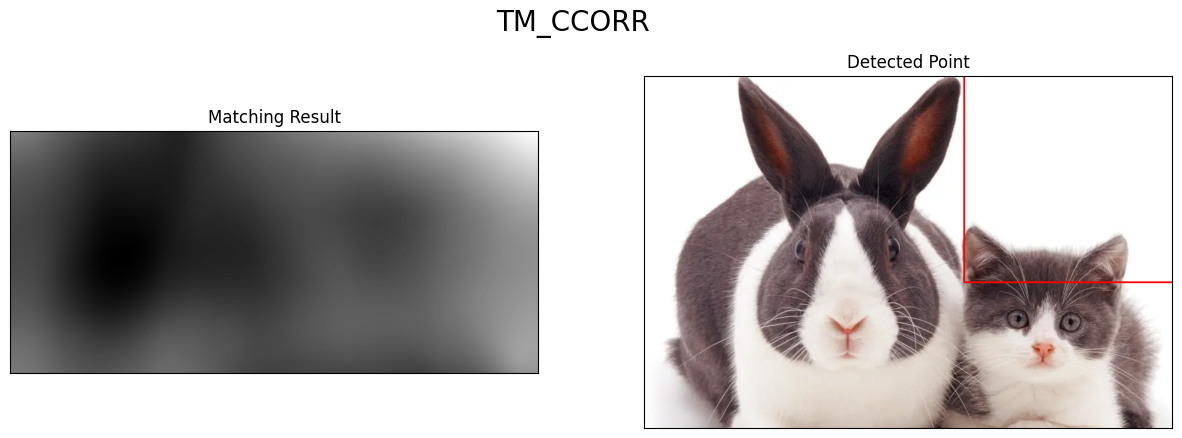

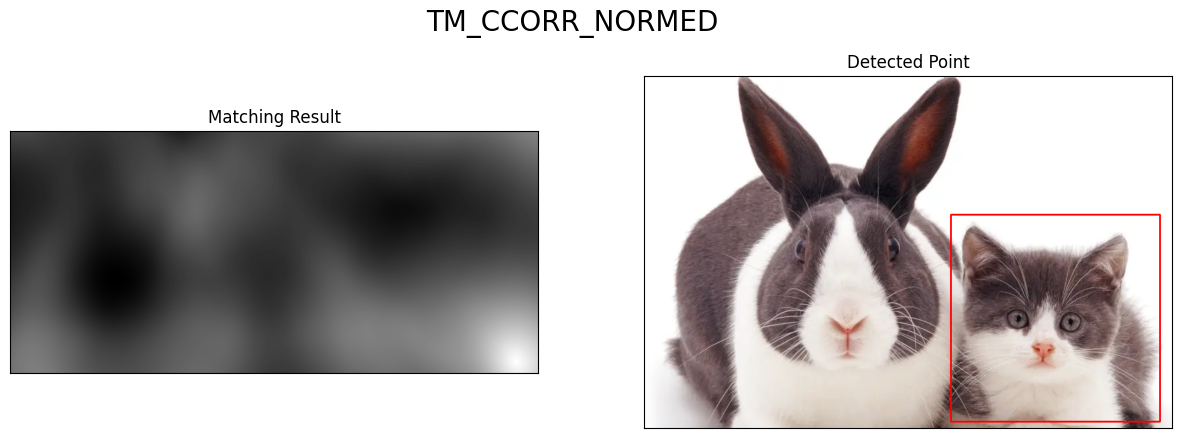

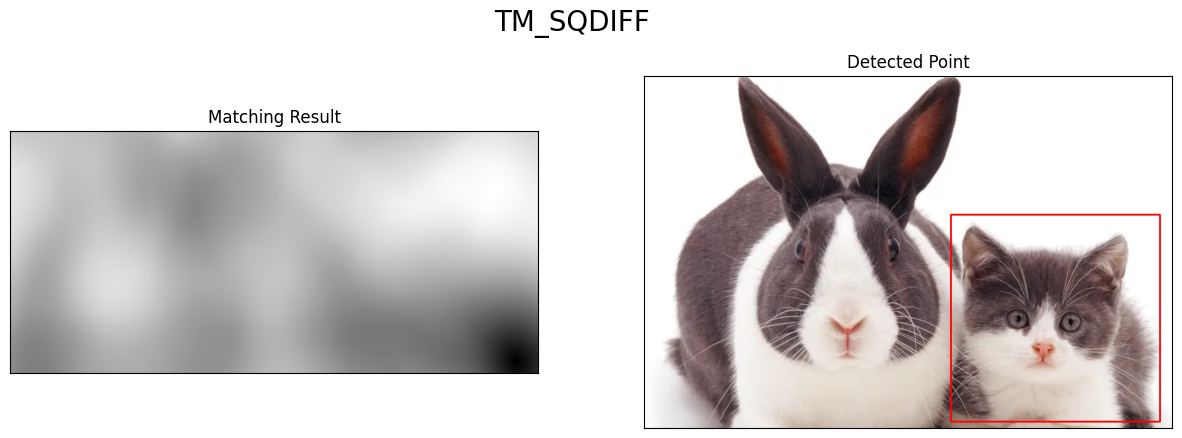

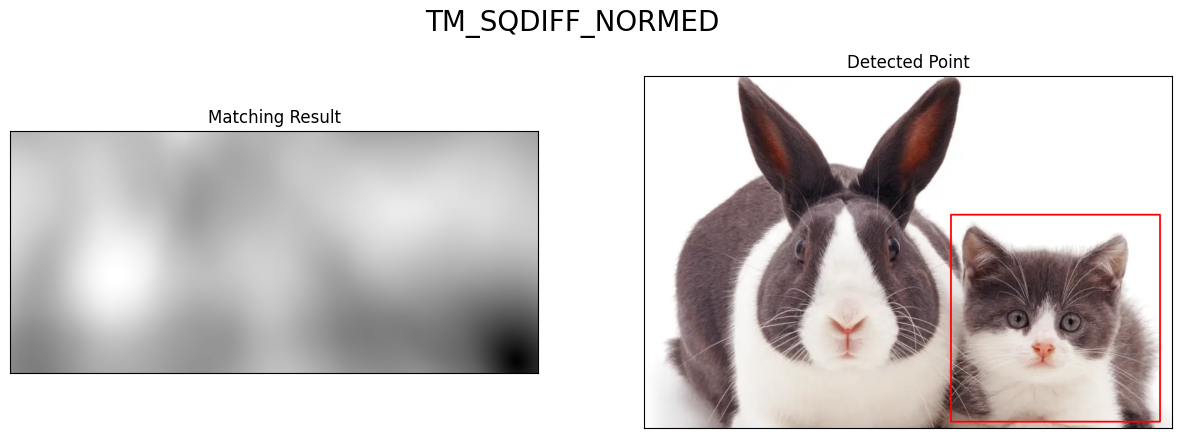

In [8]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

template_img = cv.imread('/content/drive/MyDrive/PCVK/cats_template.jpg', 0)
template_width, template_height = template_img.shape[::-1]

# Menampilkan input_img dan template_img
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
axes[0].set_title("Input Image")
axes[1].imshow(template_img, cmap='gray')
axes[1].set_title("Template Image")

# metode template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method_name in methods:
    # Membuat salinan citra berwarna untuk menampilkan hasil
    image_result = input_img.copy()
    method = eval(method_name)

    # Menerapkan template matching
    match_result = cv.matchTemplate(gray_img, template_img, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(match_result)

    # Menentukan titik sudut kiri atas berdasarkan metode
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Menggambar kotak merah di sekitar area yang cocok
    cv.rectangle(image_result, top_left, bottom_right, (0, 0, 255), 2)

    # Menampilkan hasil pencocokan dan deteksi
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.imshow(match_result, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])

    # Menampilkan nama metode yang digunakan sebagai judul
    plt.suptitle(method_name.replace('cv.', ''), fontsize=20)
    plt.show()

**3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:**

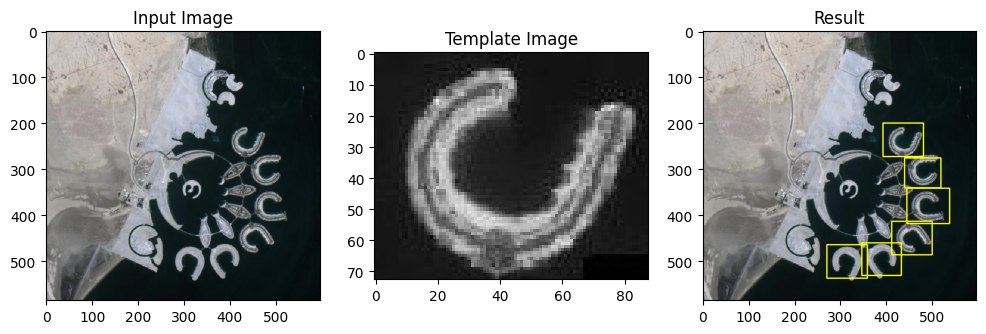

In [9]:
# Menentukan jalur citra dan template, kemudian memanggil fungsi
input_img = '/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg'
template_img = '/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg'

def match_template(input_img, template_img, threshold=0.5):
    # Membaca citra dan template
    image = cv.imread(input_img, cv.IMREAD_COLOR)
    template = cv.imread(template_img, cv.IMREAD_COLOR)

    # Mengubah citra dan template ke grayscale
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

    # Mendapatkan ukuran template asli
    h, w = template_gray.shape

    # Variabel untuk menyimpan hasil deteksi
    image_plot = image.copy()
    rectangles = []  # Menyimpan semua kotak deteksi

    # Template matching multi-skala dengan skala yang terbatas
    scales = [0.9, 1.0, 1.1]  # Skala template yang lebih mendekati ukuran target
    for scale in scales:
        # Sesuaikan ukuran template
        resized_template = cv.resize(template_gray, (int(w * scale), int(h * scale)))
        h_resized, w_resized = resized_template.shape

        # Lakukan template matching pada skala saat ini
        res = cv.matchTemplate(image_gray, resized_template, cv.TM_CCOEFF_NORMED)

        # Salin hasil matching untuk proses iteratif
        res_copy = res.copy()

        # Cari semua lokasi yang memenuhi threshold secara iteratif
        while True:
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res_copy)
            if max_val < threshold:
                break

            # Tambahkan semua kotak deteksi ke daftar
            rectangles.append([max_loc[0], max_loc[1], w_resized, h_resized])

            # Hapus area yang sudah dideteksi dari res_copy
            res_copy[max_loc[1]:max_loc[1] + h_resized, max_loc[0]:max_loc[0] + w_resized] = 0

    rectangles, _ = cv.groupRectangles(rectangles, groupThreshold=1, eps=0.3)

    for (x, y, w, h) in rectangles:
        cv.rectangle(image_plot, (x, y), (x + w, y + h), (0, 255, 255), 2)

    image_rgb = cv.cvtColor(image_plot, cv.COLOR_BGR2RGB)

    # Menampilkan gambar input, template, dan hasil
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('on')

    ax[1].imshow(template_gray, cmap='gray')
    ax[1].set_title('Template Image')
    ax[1].axis('on')

    ax[2].imshow(image_rgb)
    ax[2].set_title('Result')
    ax[2].axis('on')

    plt.show()

match_template(input_img, template_img, threshold=0.45)

**4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:**

a. Sobel Edge Detection

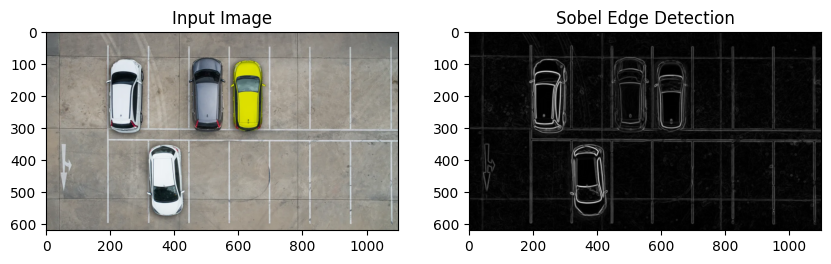

In [12]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')

def sobel_edge_detection(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    grad_x = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=5)
    grad_y = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = cv.magnitude(grad_x, grad_y)
    gradient_normalized = cv.normalize(gradient_magnitude, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
    return gradient_normalized

# Menerapkan Sobel Edge Detection
sobel_edges = sobel_edge_detection(input_img)

# Menampilkan Hasil Sobel Edge Detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[1].imshow(sobel_edges, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
plt.show()

b. Canny Edge Detection

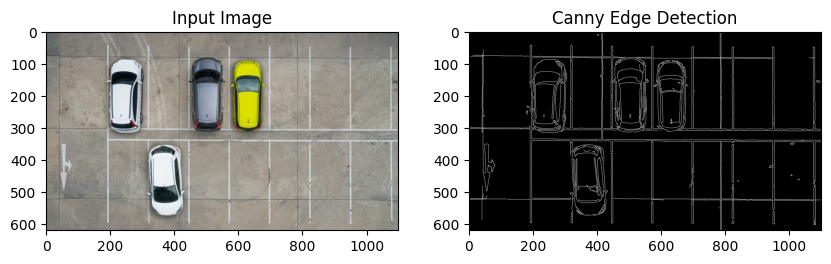

In [14]:
def canny_edge_detection(image, threshold1=50, threshold2=150):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    edges = cv.Canny(blurred, threshold1, threshold2)
    return edges

# Menerapkan Canny Edge Detection
canny_edges = canny_edge_detection(input_img)

# Menampilkan hasil Canny Edge Detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()

c. Laplacian Edge Detection

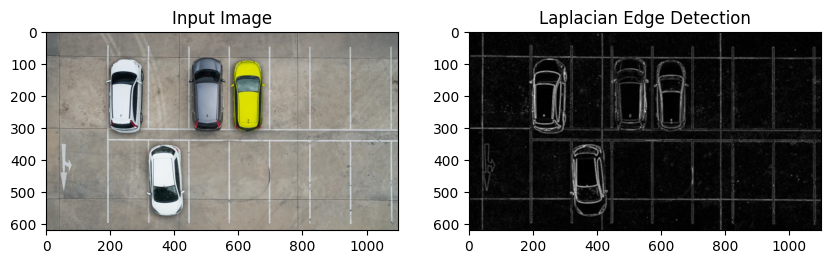

In [15]:
def laplacian_edge_detection(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (3, 3), 0)
    edges = cv.Laplacian(blurred, cv.CV_64F, ksize=3)
    edges_abs = cv.convertScaleAbs(edges)
    return edges_abs

# Menerapkan Laplacian Edge Detection
laplacian_edges = laplacian_edge_detection(input_img)

# Menampilkan hasil Laplacian Edge Detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[1].imshow(laplacian_edges, cmap='gray')
ax[1].set_title('Laplacian Edge Detection')
plt.show()

**5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:**

a. Harris Corner Detection

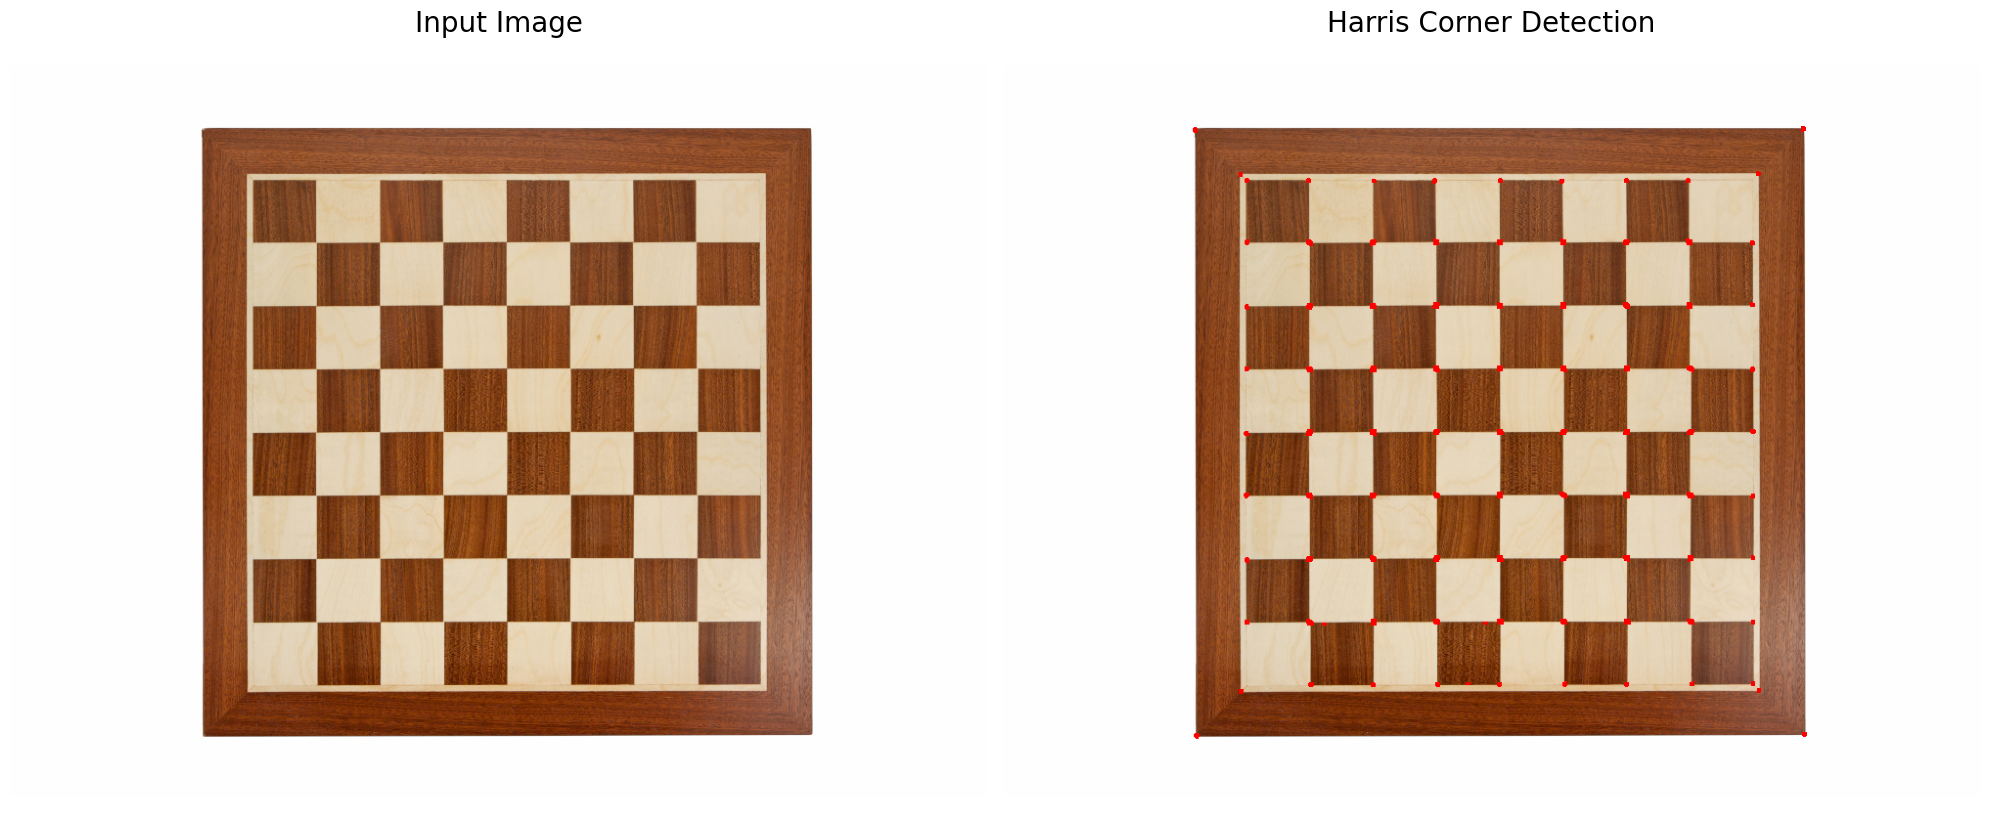

In [28]:
path = '/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg'
input_img = cv.imread(path)

def harris_corner_detection(input_img, ksize=3, k=0.04):
    gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, blockSize=ksize, ksize=ksize, k=k)
    dst = cv.dilate(dst, None)
    return dst

# Menerapkan Harris Corner Detection
harris_corners = harris_corner_detection(input_img)

# Menandai sudut yang terdeteksi pada gambar
image_rgb = cv.cvtColor(input_img, cv.COLOR_BGR2RGB)
image_harris = image_rgb.copy()
image_harris[harris_corners > 0.02 * harris_corners.max()] = [255, 0, 0]

# Menampilkan hasil Harris Corner Detection
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image_rgb)
axes[0].set_title('Input Image', fontsize=20)
axes[0].axis('off')

axes[1].imshow(image_harris)
axes[1].set_title('Harris Corner Detection', fontsize=20)
axes[1].axis('off')

plt.tight_layout()
plt.show()

b. Shi-Tomasi Detection

<ipython-input-27-6260aff0ce7c>:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


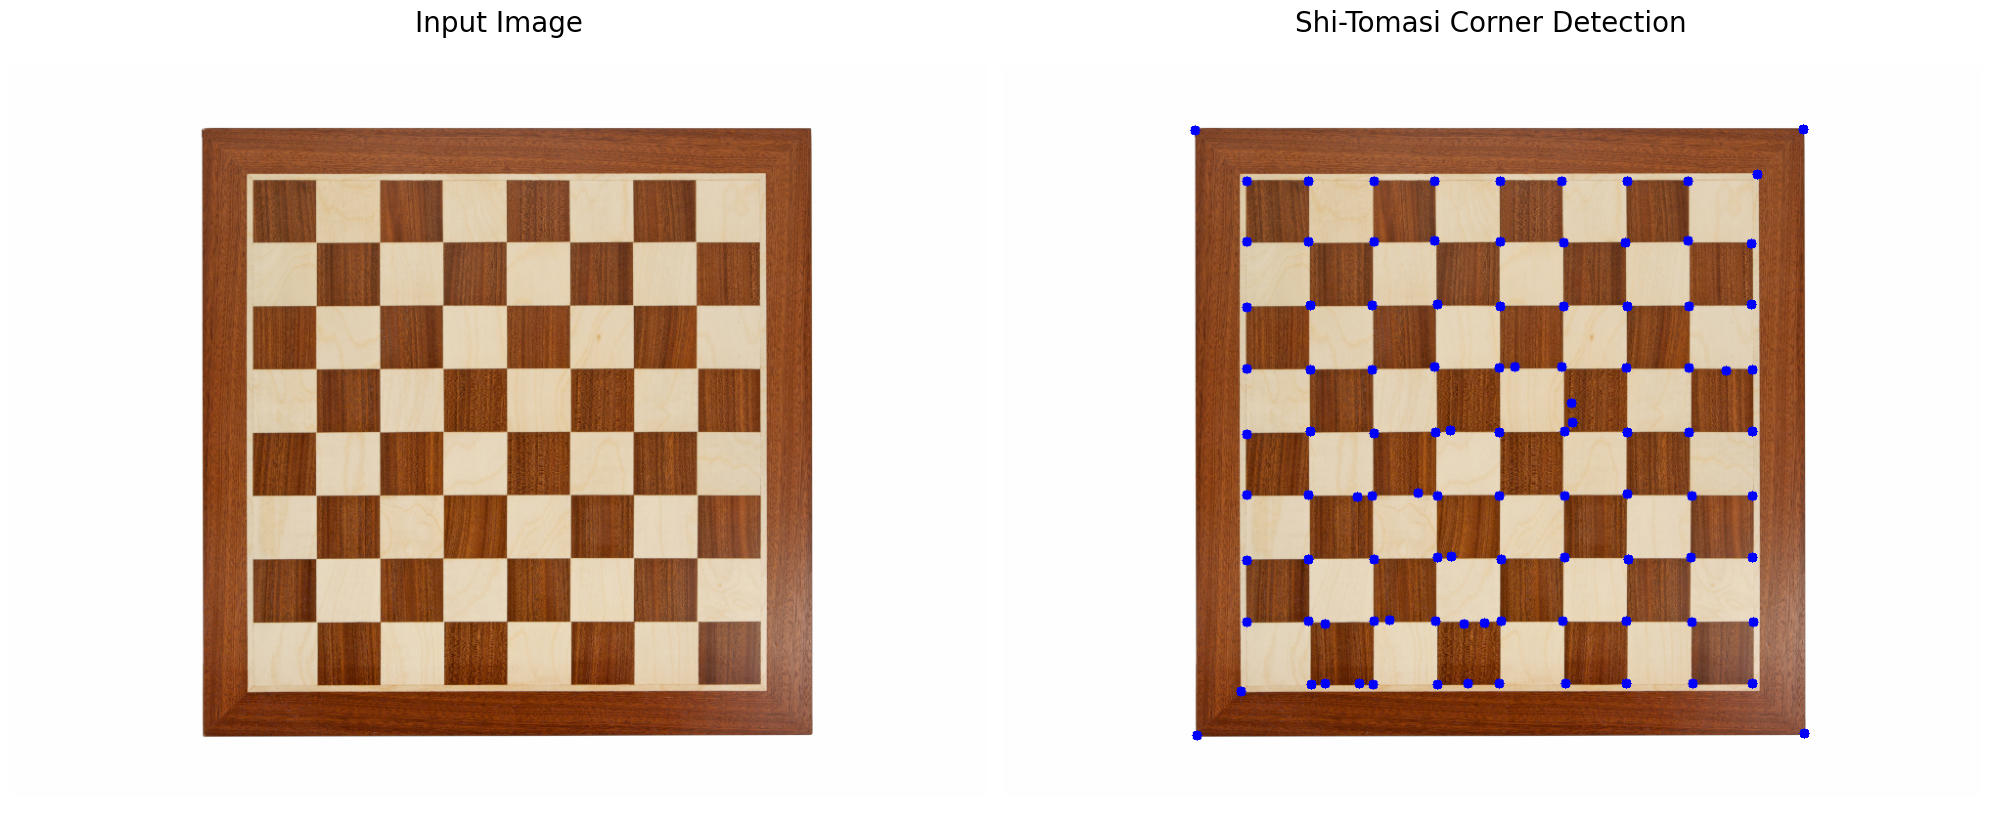

In [27]:
def shi_tomasi_detection(input_img):
    # Convert image ke grayscale
    image_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

    # Menerapkan Shi-Tomasi Corner Detection
    corners = cv.goodFeaturesToTrack(image_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)

    # Menandai sudut yang terdeteksi pada gambar
    image_shi_tomasi = input_img.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv.circle(image_shi_tomasi, (x, y), 5, (255, 0, 0), -1)  # Red circles for detected corners

    return image_shi_tomasi

image_shi_tomasi = shi_tomasi_detection(input_img)

# Menampilkan hasil Shi-Tomasi Corner Detection
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
axes[0].set_title('Input Image', fontsize=20)
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
axes[1].set_title('Shi-Tomasi Corner Detection', fontsize=20)
axes[1].axis('off')

plt.tight_layout()
plt.show()

**6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:**

Jumlah garis Hough awal: 33
Jumlah garis setelah disaring: 20


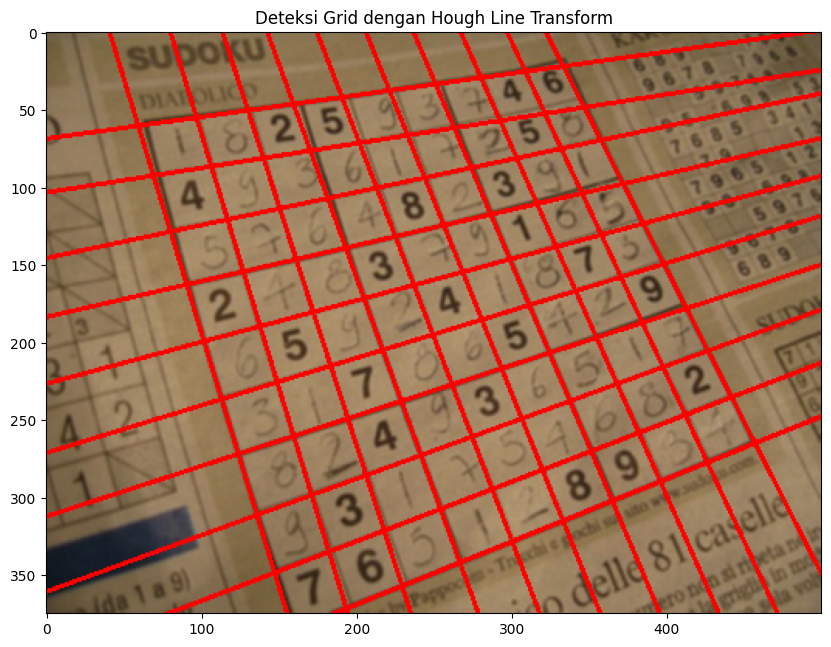

In [29]:
def hough_lines_detection(input_img_path):
    # Membaca dan memproses gambar input
    input_img = cv.imread(input_img_path)
    img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan Canny dengan threshold yang sama seperti kode awal
    edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

    # Melakukan dilasi dengan kernel (3, 3) dan erosi dengan kernel (5, 5)
    edges = cv.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
    edges = cv.erode(edges, np.ones((5, 5), np.uint8), iterations=1)

    # Menggunakan Transformasi Hough untuk deteksi garis
    lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

    # Jika tidak ada garis yang terdeteksi, berikan pesan
    if lines is None:
        print('Tidak ada garis yang terdeteksi')
        return None

    # Menetapkan threshold untuk menggabungkan garis yang serupa
    rho_threshold = 15  # kembali ke nilai threshold awal
    theta_threshold = 0.1

    # Menyaring garis-garis berdasarkan kemiripan untuk menghindari duplikasi
    unique_lines = []
    for i in range(len(lines)):
        rho_i, theta_i = lines[i][0]
        duplicate = False
        for rho_j, theta_j in unique_lines:
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                duplicate = True
                break
        if not duplicate:
            unique_lines.append((rho_i, theta_i))

    # Menampilkan jumlah garis awal dan setelah disaring
    print('Jumlah garis Hough awal:', len(lines))
    print('Jumlah garis setelah disaring:', len(unique_lines))

    # Menggambar garis unik pada gambar asli
    for rho, theta in unique_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Menampilkan hasil akhir
    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title('Deteksi Grid dengan Hough Line Transform')
    plt.show()

# Contoh pemanggilan fungsi
input_img_path = '/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg'
hough_lines_detection(input_img_path)

**7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:**

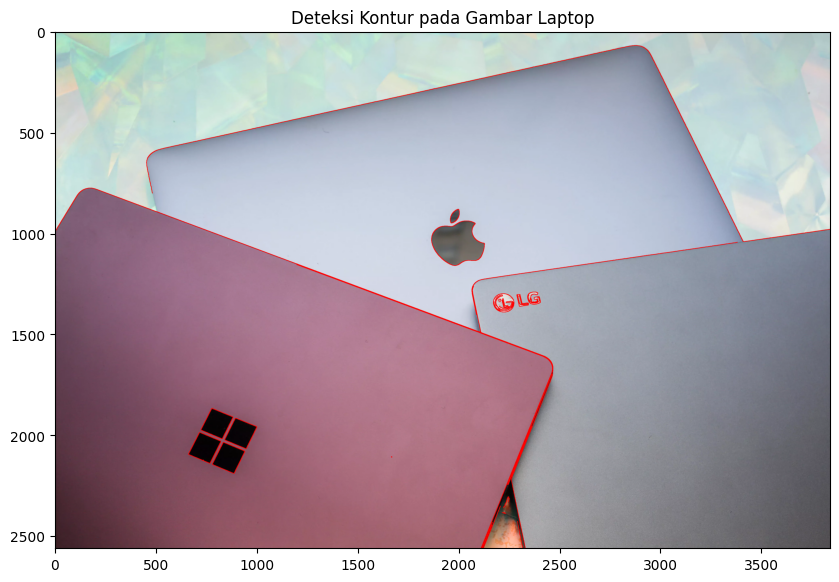

In [30]:
def contour_detection(image_path):
    # Membaca gambar dan mengubahnya menjadi grayscale
    img = cv.imread(image_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Menggunakan Gaussian Blur untuk mengurangi noise
    blurred = cv.GaussianBlur(img_gray, (5, 5), 0)

    # Menerapkan deteksi tepi Canny
    edges = cv.Canny(blurred, 50, 150)

    # Menemukan kontur menggunakan findContours
    contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Menggambar kontur yang ditemukan pada gambar asli
    img_contours = img.copy()
    cv.drawContours(img_contours, contours, -1, (0, 0, 255), 2)

    # Menampilkan hasil gambar dengan kontur yang ditandai
    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(img_contours, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title('Deteksi Kontur pada Gambar Laptop')
    plt.show()

# Memanggil fungsi dengan path gambar
image_path = '/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg'
contour_detection(image_path)

## Pengayaan Materi KTP

---

**1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban**

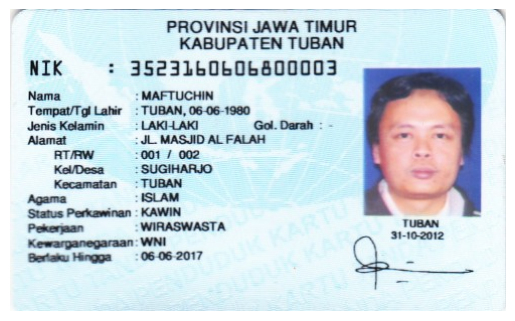

In [41]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp3.png')
original_img = cv.cvtColor(input_img, cv.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.axis('off')
plt.show()

**2. Muat 2 library berikut sebagai tahapan persiapan**

In [52]:
import cv2
import os
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

**3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut**

In [56]:
# Tentukan lokasi direktori dataset
path_plate = '/content/drive/MyDrive/PCVK/KTP_More/KTP_More'

# Looping untuk setiap file di dalam direktori
for name_file in sorted(os.listdir(path_plate)):
    # Baca gambar dari file
    src = cv2.imread(os.path.join(path_plate, name_file))
    if src is None:
        continue  # Skip file jika gagal dibaca
    blurred = src.copy()
    gray = blurred.copy()

**4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi**

In [57]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

**5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)**

In [58]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)


160.0 (636, 996)


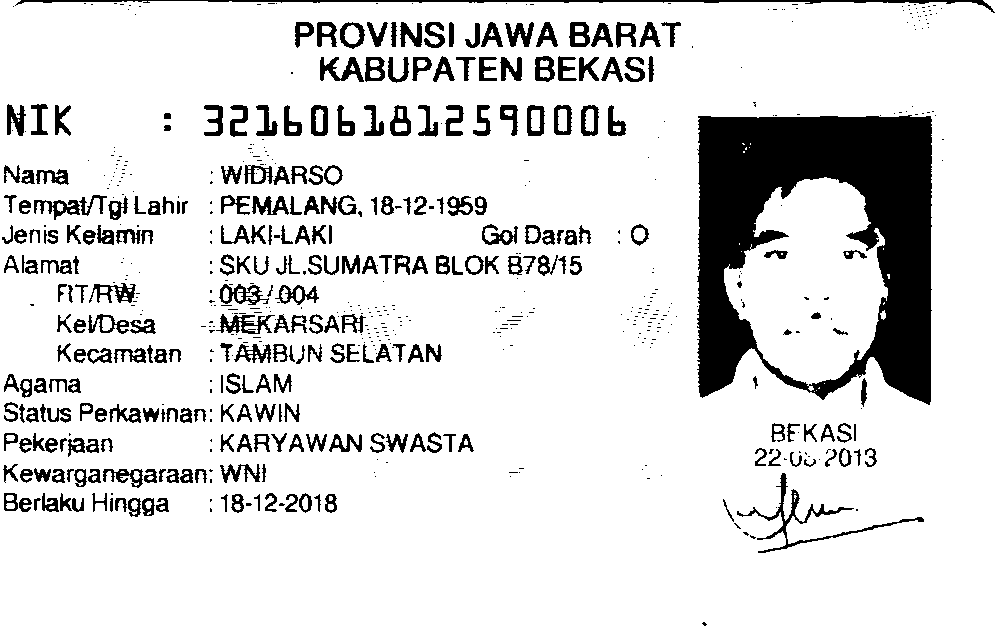

In [59]:
cv2_imshow(bw)

**6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.**

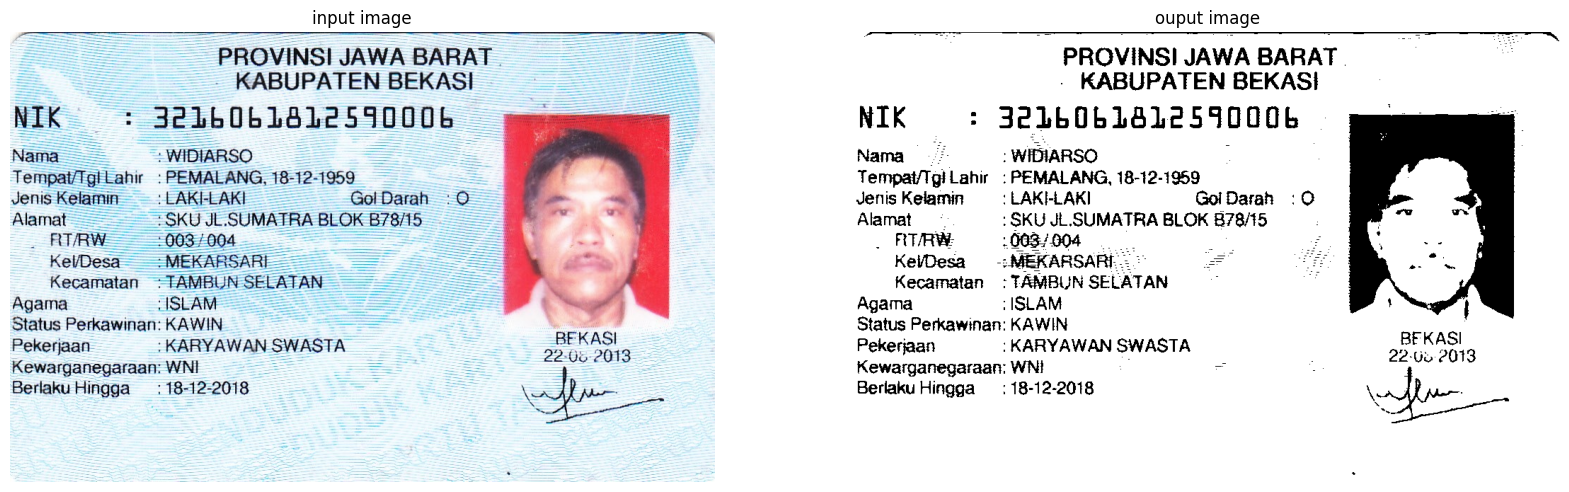

In [68]:
# Tampilkan gambar asli dan hasil deteksi tepi
f, ax = plt.subplots(1, 2, figsize=(20, 10))
# Menampilkan citra awal (gambar asli)
ax[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
ax[0].set_title('input image')
ax[0].axis('off')

# Menampilkan hasil deteksi tepi (gambar hitam putih)
ax[1].imshow(bw, cmap='gray')
ax[1].set_title('ouput image')
ax[1].axis('off')

plt.show()

**7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).**

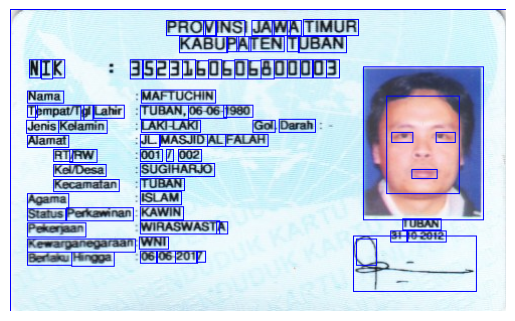

In [67]:
# Membaca gambar
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp3.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred_image = cv.GaussianBlur(ktp_image, (5, 5), 0.5)

# Konversi gambar menjadi grayscale
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Operasi morfologi erosi dengan elemen struktur yang sedikit lebih besar
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur dari gambar erosi
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping untuk menyeleksi kontur berdasarkan ukuran dan rasio
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)

# Konversi gambar ke RGB untuk ditampilkan dengan plt
ktp_rgb_image = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)

# Menampilkan gambar hasil deteksi kontur
plt.imshow(ktp_rgb_image)
plt.axis('off')
plt.show()

## **Tugas Praktikum Materi KTP**

---

**Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:**
1. Kelompok 1 – KTP Riyanto Sleman
2. Kelompok 2 – KTP Galang Raka Bengkulu
3. Kelompok 3 – KTP Arief Wijaya Cimahi
4. Kelompok 4 – KTP Edo Nias
5. Kelompok 5 – KTP Widiarso Bekasi
6. Kelompok 6 – KTP Abdurrauf Soppeng

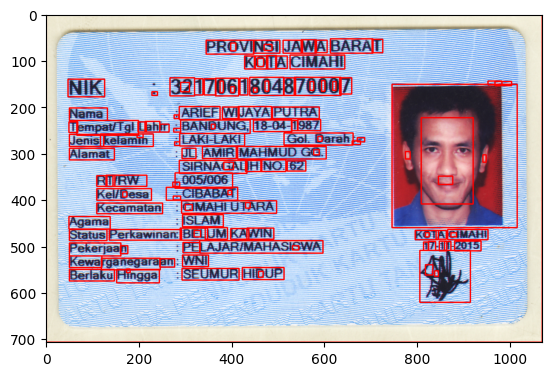

In [66]:
# Membaca gambar
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp2.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred_image = cv.GaussianBlur(ktp_image, (5, 5), 0.5)

# Konversi gambar menjadi grayscale
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Operasi morfologi erosi dengan elemen struktur yang sedikit lebih besar
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur dari gambar erosi
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping untuk menyeleksi kontur berdasarkan ukuran dan rasio
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Konversi gambar ke RGB untuk ditampilkan dengan plt
ktp_rgb_image = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)

# Menampilkan gambar hasil deteksi kontur
plt.imshow(ktp_rgb_image)
plt.show()